In [1]:
from PIL import Image
import pandas as pd
import numpy as np
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ourGenre = 'Sci-Fi'

In [3]:
data = pd.read_csv(f"../GenresCSV/{ourGenre}.csv")
data

,Unnamed: 0,imdbID,Genre
0,0,tt0080684,0
1,1,tt0080684,0
2,2,tt0080684,0
3,3,tt0080377,0
4,4,tt0080377,0
...,...,...,...
1443,1443,tt1598642,1
1444,1444,tt4337072,1
1445,1445,tt3625220,1
1446,1446,tt3848938,1


In [4]:
genre = []
poster = []

In [5]:
for i in range(len(data)):
    tempImage = Image.open(f"../Posters100x100/{data['imdbID'][i]}.jpg")
    poster.append(np.array(tempImage))
    genre.append(data['Genre'][i])

In [6]:
print(len(genre))
print(len(poster))
print(len(poster[0]))
print(len(poster[0][0]))
print(len(poster[0][0][0]))

1448
1448
100
100
3


In [7]:
GenreStrings = [f"Not {ourGenre}", f"{ourGenre}"]

In [8]:
for i in range(len(poster) -1, -1 ,-1):
    if poster[i].shape != (100,100,3): 
        #some posters didnt have 100,100,3 so we deleted them
        genre.pop(i)
        poster.pop(i)
        
print(len(genre))

1448


In [9]:
X_train, X_test, y_train, y_test = train_test_split(poster, genre, test_size=0.1)

In [10]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

1303
1303
145
145


In [11]:
X_train = np.array(X_train) #turn them into numpy arrays
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print("x_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

x_train shape: (1303, 100, 100, 3)
1303 train samples
145 test samples


In [13]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)
print (y_train.shape)
print(y_test.shape)
print (y_train)
print (y_train[0])

(1303, 2)
(145, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[1. 0.]


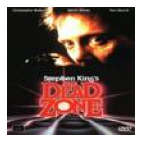

[0. 1.]
Sci-Fi


In [14]:
index = 50
plt.figure(figsize=(20, 4))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(X_train[index].reshape(100, 100,3))
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()
print(y_train[index])
print(GenreStrings[np.argmax(y_train[index])])

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(len(GenreStrings), activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 20000)             0         
                                                                 
 dropout (Dropout)           (None, 20000)             0

In [16]:
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])

In [ ]:
# Loads the weights
checkpoint_path = f"../Weights/{GenreStrings[1]}/cp.ckpt"
model.load_weights(checkpoint_path)
# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [17]:
model.fit(X_train, y_train, epochs =5, batch_size=128, shuffle=True, validation_split=0.2)

Epoch 1/5
9/9 [==============================] - 7s 723ms/step - loss: 0.7218 - accuracy: 0.5413 - val_loss: 0.6735 - val_accuracy: 0.5977
Epoch 2/5
9/9 [==============================] - 7s 759ms/step - loss: 0.6545 - accuracy: 0.6488 - val_loss: 0.6475 - val_accuracy: 0.6207
Epoch 3/5
9/9 [==============================] - 7s 730ms/step - loss: 0.6055 - accuracy: 0.6708 - val_loss: 0.6266 - val_accuracy: 0.6284
Epoch 4/5
9/9 [==============================] - 7s 718ms/step - loss: 0.5671 - accuracy: 0.7111 - val_loss: 0.5847 - val_accuracy: 0.6897
Epoch 5/5
9/9 [==============================] - 7s 728ms/step - loss: 0.5217 - accuracy: 0.7630 - val_loss: 0.5590 - val_accuracy: 0.7510


(145, 2)


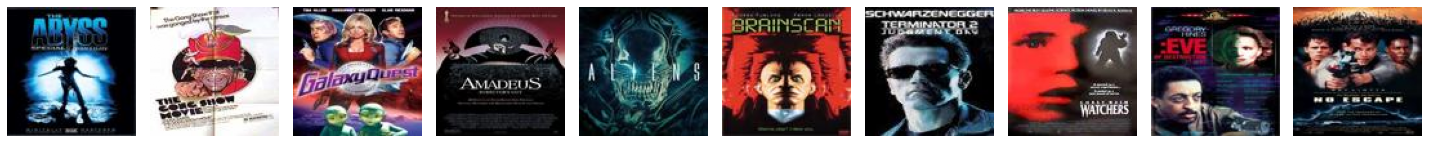

[0.03582741 0.9641726 ]
1
Genre is Sci-Fi Predicted is Sci-Fi ([0.03582741 0.9641726 ])
Genre is Not Sci-Fi Predicted is Not Sci-Fi ([0.955933   0.04406704])
Genre is Sci-Fi Predicted is Not Sci-Fi ([0.78898627 0.21101372])
Genre is Not Sci-Fi Predicted is Not Sci-Fi ([0.8263988  0.17360124])
Genre is Sci-Fi Predicted is Sci-Fi ([0.3635864 0.6364137])
Genre is Sci-Fi Predicted is Not Sci-Fi ([0.55377644 0.4462235 ])
Genre is Sci-Fi Predicted is Sci-Fi ([0.06901127 0.9309887 ])
Genre is Sci-Fi Predicted is Sci-Fi ([0.18852827 0.81147176])
Genre is Sci-Fi Predicted is Sci-Fi ([0.28906956 0.7109304 ])
Genre is Sci-Fi Predicted is Sci-Fi ([0.24659866 0.7534013 ])


In [19]:
# Compare original images with Predicted ones
decoded_imgs1 = model.predict(X_test)
offset = 0
decoded_imgs1= decoded_imgs1[offset:]
print(decoded_imgs1.shape)
plt.figure(figsize=(20, 4))
for i in range(10):
    # original
    plt.subplot(2, 10, i + 1)
    # plt.figure(figsize = (15,2))
    plt.imshow(X_test[i+offset].reshape(100, 100,3))
    plt.gray()
    plt.axis('off')
plt.tight_layout()
plt.show()
print(decoded_imgs1[0])
print(np.argmax(decoded_imgs1[0]))
for i in range(10):
  print(f"Genre is {GenreStrings[np.argmax(y_test[i+offset])]} Predicted is {GenreStrings[np.argmax(decoded_imgs1[i])]} ({decoded_imgs1[i+offset]})")

In [20]:
#Evaluate the trained model
#Should have test and train genres equal
score = model.evaluate(X_test, y_test)
print("Test Loss: {:.2f}%".format(score[0]*100))
print("Test Accuracy:  {:.2f}%".format(score[1]*100))

5/5 [==============================] - 0s 36ms/step - loss: 0.4478 - accuracy: 0.7931
Test Loss: 44.78%
Test Accuracy:  79.31%


In [22]:
model.save_weights(checkpoint_path)